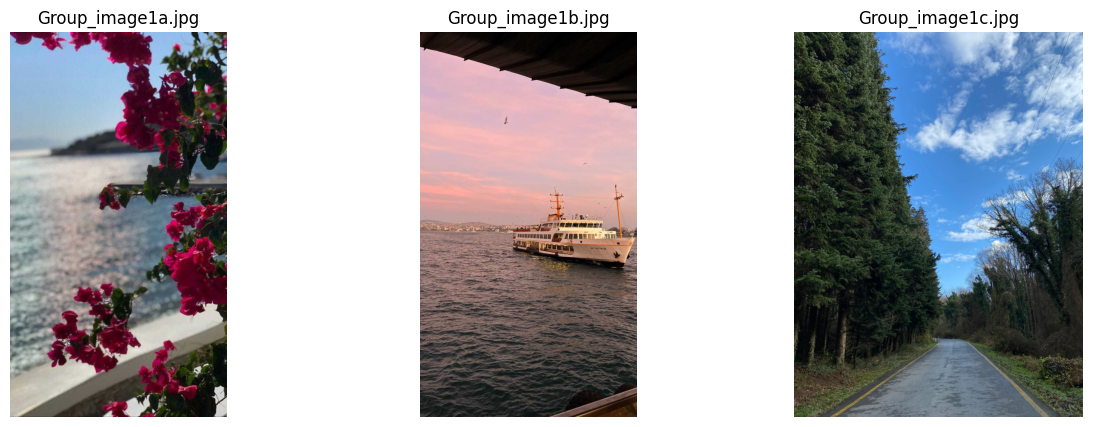

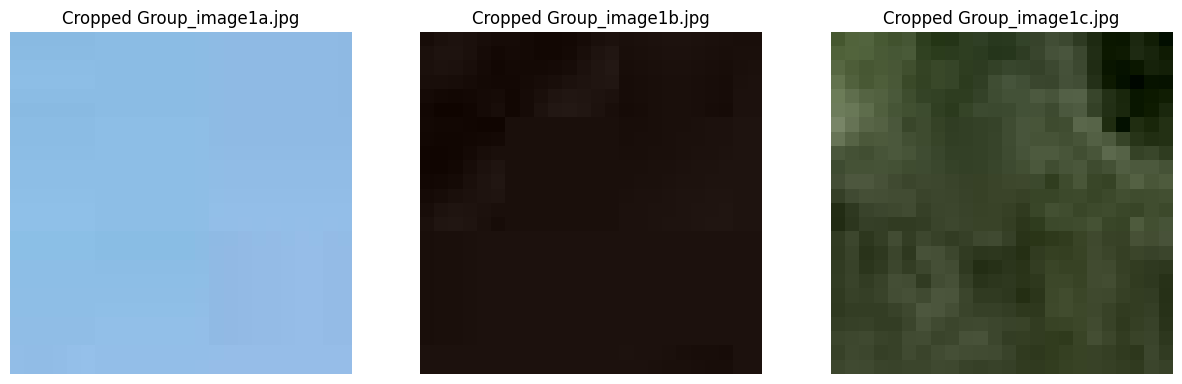

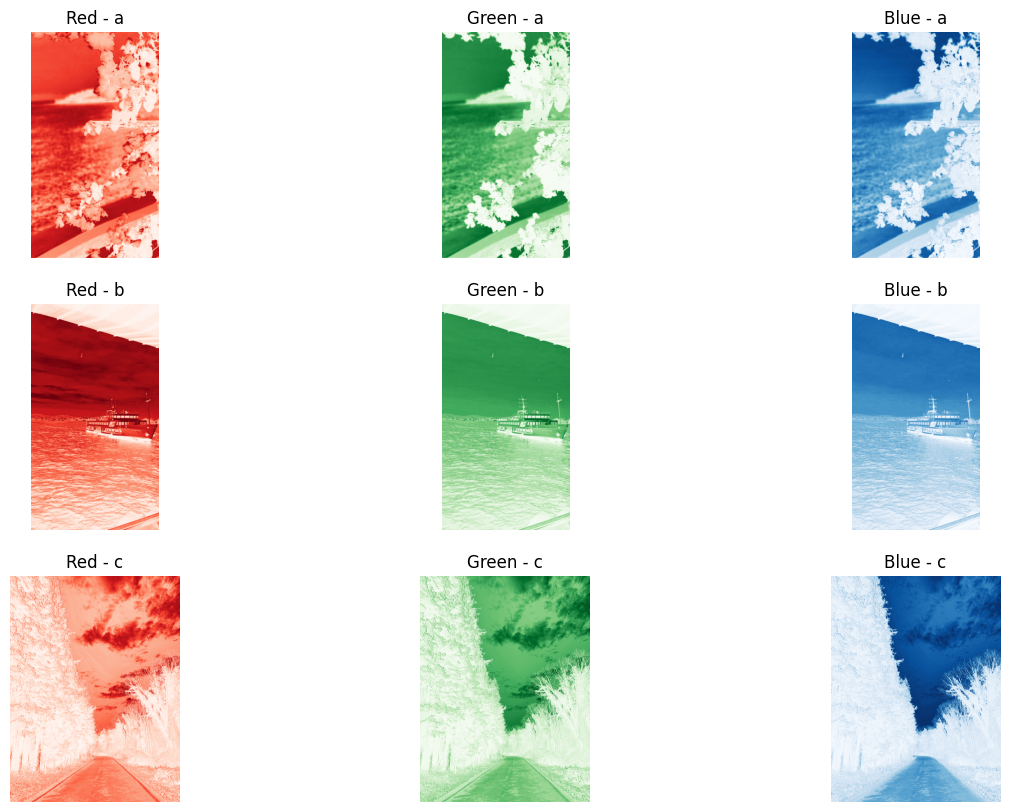

Pixel values for Group_image1a.jpg
Red Channel Sample:  [[137 137 137 137 137]
 [138 138 138 138 138]
 [140 140 140 140 140]
 [141 141 141 141 141]
 [139 139 139 139 139]]
Green Channel Sample:  [[186 186 186 186 186]
 [187 187 187 187 187]
 [189 189 189 189 189]
 [190 190 190 190 190]
 [188 188 188 188 188]]
Blue Channel Sample:  [[226 226 226 226 226]
 [227 227 227 227 227]
 [229 229 229 229 229]
 [230 230 230 230 230]
 [228 228 228 228 228]]
--------------------------------------
Pixel values for Group_image1b.jpg
Red Channel Sample:  [[23 27 29 27 24]
 [27 30 30 27 22]
 [27 29 28 25 21]
 [25 25 24 22 20]
 [21 19 18 19 21]]
Green Channel Sample:  [[12 16 18 16 13]
 [16 19 19 16 11]
 [16 18 17 14 10]
 [14 14 13 11  9]
 [10  8  7  8 10]]
Blue Channel Sample:  [[ 8 12 14 12  9]
 [12 15 15 12  7]
 [12 14 13 10  6]
 [10 10  9  7  5]
 [ 6  4  3  4  6]]
--------------------------------------
Pixel values for Group_image1c.jpg
Red Channel Sample:  [[ 69  81  82  71  65]
 [ 79  82  80  73  7

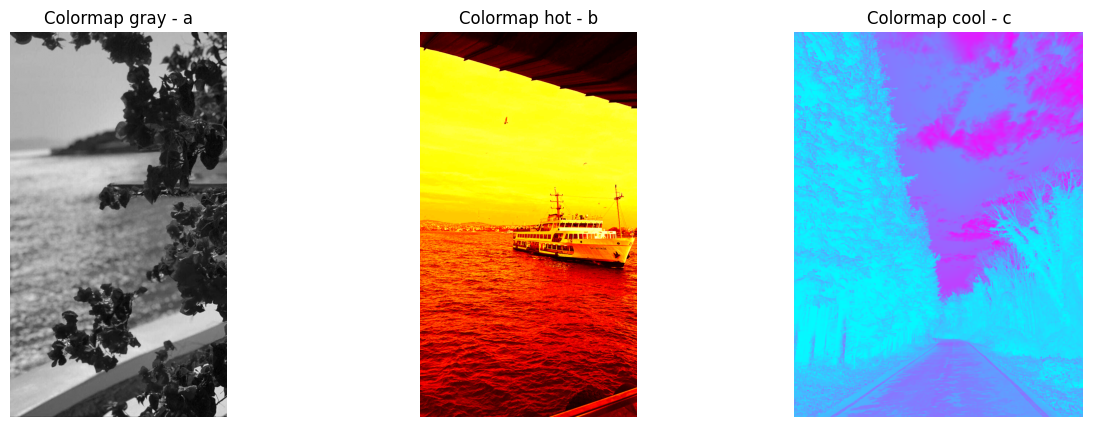

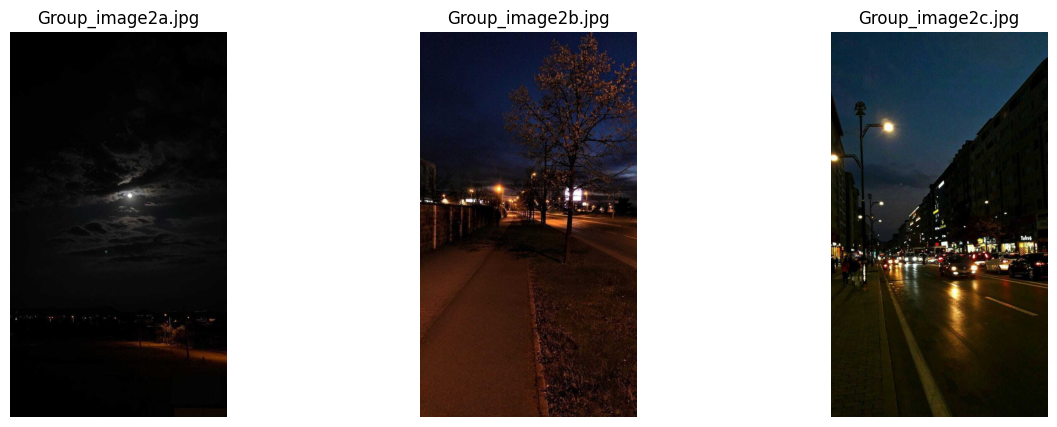

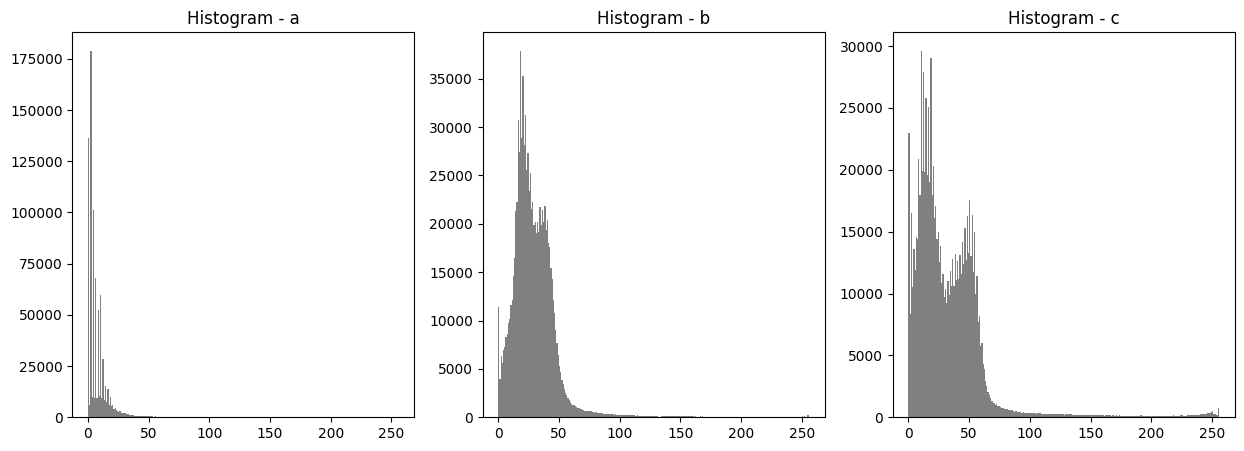

Histogramları incelediğimizde, düşük ışıklı görsellerde genellikle parlaklık düşük ve piksel değerleri daha koyu bölgelerde yoğunlaşır. Kontrast artırmak için histogram eşitleme (histogram equalization) veya parlaklık ayarlamaları yapılabilir.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# File paths for Group9 images 
group_images = {
    "color": {
        "a": "/content/Group9_image1a.jpg",
        "b": "/content/Group9_image1b.jpg",
        "c": "/content/Group9_image1c.jpg",
    },
    "low_light": {
        "a": "/content/Group9_image2a.jpg",
        "b": "/content/Group9_image2b.jpg",
        "c": "/content/Group9_image2c.jpg",
    }
}

# 1. Display color images side-by-side
plt.figure(figsize=(15,5))
for idx, key in enumerate(group_images["color"]):
    img = cv2.cvtColor(cv2.imread(group_images["color"][key]), cv2.COLOR_BGR2RGB)
    plt.subplot(1,3,idx+1)
    plt.imshow(img)
    plt.title(f'Group9_image1{key}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Display 24x24 cropped regions
plt.figure(figsize=(15,5))
for idx, key in enumerate(group_images["color"]):
    img = cv2.cvtColor(cv2.imread(group_images["color"][key]), cv2.COLOR_BGR2RGB)
    cropped = img[50:74, 50:74]  # 24x24 crop
    plt.subplot(1,3,idx+1)
    plt.imshow(cropped)
    plt.title(f'24x24 Crop\nGroup9_image1{key}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Separate and display color channels
fig, axes = plt.subplots(3, 3, figsize=(15,10))
for i, key in enumerate(group_images["color"]):
    img = cv2.cvtColor(cv2.imread(group_images["color"][key]), cv2.COLOR_BGR2RGB)
    for j, channel in enumerate(["Red", "Green", "Blue"]):
        axes[i,j].imshow(img[:,:,j], cmap='gray')
        axes[i,j].set_title(f'{channel} Channel\nGroup9_image1{key}')
        axes[i,j].axis('off')
plt.tight_layout()
plt.show()

# 4. Print pixel values for color channels
for key in group_images["color"]:
    img = cv2.imread(group_images["color"][key])
    print(f"\nGroup9_image1{key} Pixel Values (5x5 sample):")
    print("Red Channel:\n", img[50:55, 50:55, 2])  # OpenCV BGR format
    print("Green Channel:\n", img[50:55, 50:55, 1])
    print("Blue Channel:\n", img[50:55, 50:55, 0])

# 5. Display images with different colormaps
plt.figure(figsize=(15,5))
cmaps = ['viridis', 'plasma', 'inferno']
for idx, key in enumerate(group_images["color"]):
    img = cv2.cvtColor(cv2.imread(group_images["color"][key]), cv2.COLOR_BGR2GRAY)
    plt.subplot(1,3,idx+1)
    plt.imshow(img, cmap=cmaps[idx])
    plt.title(f'{cmaps[idx].title()}\nGroup9_image1{key}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 6. Display low-light images
plt.figure(figsize=(15,5))
for idx, key in enumerate(group_images["low_light"]):
    img = cv2.cvtColor(cv2.imread(group_images["low_light"][key]), cv2.COLOR_BGR2RGB)
    plt.subplot(1,3,idx+1)
    plt.imshow(img)
    plt.title(f'Group9_image2{key}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# 7. Generate histograms for low-light images
plt.figure(figsize=(15,5))
for idx, key in enumerate(group_images["low_light"]):
    img = cv2.cvtColor(cv2.imread(group_images["low_light"][key]), cv2.COLOR_BGR2GRAY)
    plt.subplot(1,3,idx+1)
    plt.hist(img.ravel(), bins=50, range=[0,256], color='gray')
    plt.title(f'Histogram\nGroup9_image2{key}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram analysis
print("""
Histogram Analysis:
1. Left-skewed histograms indicate low brightness
2. Narrow histogram ranges suggest low contrast
3. Recommended improvements:
   - Histogram equalization
   - Gamma correction
   - Contrast stretching
""")